## Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('C:/Users/PAVAN/Downloads/train_data_iitm.csv')
loc_data = pd.read_csv('C:/Users/PAVAN/Downloads/taxi_zone_mapping.csv')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,NaN,2020-06-13 06:19:00,2020-06-13 06:37:00,NaN,11.58,NaN,NaN,56,42,NaN,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5


In [5]:
loc_data.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [6]:
df.shape

(60000, 12)

In [7]:
loc_data.isnull().sum()

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

In [8]:
loc_data.dropna(inplace=True)

In [9]:
# Removing trips with zero passengers, this removes all null values
df = df[df['passenger_count']>0]

In [10]:
df = df[df['trip_distance']>0]

In [11]:
loc_data['service_zone'].value_counts()

Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: service_zone, dtype: int64

In [12]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
congestion_surcharge     float64
dtype: object

In [13]:
df.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
count,51304.000000,51304,51304,51304.000000,51304.000000,51304.000000,51304,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000
unique,NaN,50526,50536,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,2020-06-11 15:30:07,2020-06-26 17:53:38,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,3,NaN,NaN,NaN,50939,NaN,NaN,NaN,NaN,NaN
mean,1.625682,NaN,NaN,1.397825,2.924363,1.027035,NaN,160.967624,155.852078,1.373051,11.588260,2.152171
std,0.483951,NaN,NaN,1.010079,3.599714,0.498003,NaN,68.304238,73.369629,0.525275,10.705493,0.896203
min,1.000000,NaN,NaN,1.000000,0.010000,1.000000,NaN,1.000000,1.000000,1.000000,-75.090000,-2.500000
25%,1.000000,NaN,NaN,1.000000,1.030000,1.000000,NaN,113.000000,90.000000,1.000000,6.000000,2.500000
50%,2.000000,NaN,NaN,1.000000,1.800000,1.000000,NaN,161.000000,158.000000,1.000000,8.500000,2.500000
75%,2.000000,NaN,NaN,1.000000,3.200000,1.000000,NaN,234.000000,234.000000,2.000000,13.000000,2.500000


In [14]:
df = df[(df['fare_amount']-df['congestion_surcharge']) > 0]

## Calculating Congestion Surcharge

In [15]:
congestion_zone = loc_data[loc_data['Borough'] == 'Manhattan']

In [16]:
#set to have all location ID so as to add surcharge at the end of prediction of fare amount
congestion_zone = set(congestion_zone['LocationID'])

## Converting given string time to time format

In [17]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

## Fill Missing Values 

In [18]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
congestion_surcharge     0
dtype: int64

## Data Visualization

In [19]:
df['RatecodeID'].value_counts()

1.0     50207
2.0       537
5.0       109
4.0        61
3.0        45
99.0        1
Name: RatecodeID, dtype: int64

In [20]:
df[df['RatecodeID']==99.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
43521,2.0,2020-06-30 12:48:18,2020-06-30 12:53:27,1.0,1.15,99.0,N,100,230,2.0,6.0,2.5


In [21]:
# There is one value of rate code ID 99, lets drop it
df.drop(43521,inplace=True)

In [22]:
df.groupby('RatecodeID').mean()

,VendorID,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
RatecodeID,,,,,,,,
1.0,1.622503,1.398231,2.723754,161.270879,155.806242,1.364332,11.068482,2.183012
2.0,1.709497,1.467412,17.509050,139.800745,156.061453,1.206704,52.000000,1.983240
3.0,1.644444,1.355556,18.184667,137.844444,49.422222,1.355556,68.222222,0.000000
4.0,1.672131,1.442623,18.825410,149.950820,226.688525,1.475410,72.385246,0.614754
5.0,1.761468,1.165138,10.646055,142.550459,181.128440,1.311927,56.698440,0.733945


In [23]:
# Let's get the fare amount per trip distance
df.groupby('RatecodeID').mean()['fare_amount']/df.groupby('RatecodeID').mean()['trip_distance']

RatecodeID
1.0    4.063687
2.0    2.969893
3.0    3.751634
4.0    3.845082
5.0    5.325770
dtype: float64

In [24]:
# convert store and forward data to integer from object
from sklearn.preprocessing import LabelEncoder
df['store_and_fwd_flag'] = LabelEncoder().fit_transform(df['store_and_fwd_flag'])

In [25]:
df.groupby('store_and_fwd_flag').mean()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
store_and_fwd_flag,,,,,,,,,
0,1.62818,1.400281,2.924983,1.024152,160.983023,155.849813,1.361207,11.706622,2.175672
1,1.01105,1.146409,3.551298,1.066298,159.198895,156.439227,1.569061,13.770691,1.940608


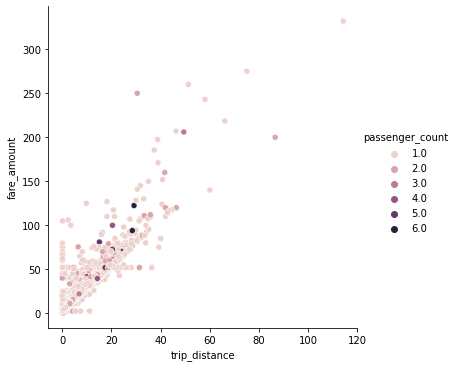

In [26]:
sns.relplot(data = df, x = 'trip_distance', y = 'fare_amount',hue='passenger_count')

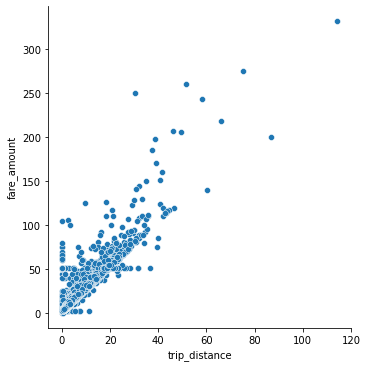

In [27]:
sns.relplot(data = df, x = 'trip_distance', y = 'fare_amount')

In [28]:
df['year'] = df['tpep_pickup_datetime'].dt.strftime('%Y')
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%m')
df['hour'] = df['tpep_pickup_datetime'].dt.strftime('%H')

In [29]:
df[['year', 'month', 'hour']] = df[['year', 'month', 'hour']].apply(pd.to_numeric)
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag                int32
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
congestion_surcharge            float64
year                              int64
month                             int64
hour                              int64
dtype: object

In [30]:
VendorID_mean = df.groupby('VendorID').mean()
VendorID_mean

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,year,month,hour
VendorID,,,,,,,,,,,,
1.0,1.157634,2.731777,1.018361,0.018674,163.637891,157.092483,1.381462,11.216372,2.206197,2020.000000,6.000000,13.536279
2.0,1.543727,3.048636,1.028124,0.000126,159.361583,155.107084,1.351359,12.025791,2.154587,2019.999654,5.999843,13.599283


**Observation**:
* The mean Fare amount is high for VendorID equal to 2, but that may due to high mean trip distance. (Let's check in correlation)

In [31]:
yearly_mean = df.groupby('year').mean()
yearly_mean

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,month,hour
year,,,,,,,,,,,,
2009,2.000000,1.000000,1.780000,1.000000,0.000000,236.000000,140.000000,2.000000,10.500000,2.500000,1.0,1.000000
2020,1.623788,1.398485,2.929455,1.024452,0.007104,160.968876,155.854311,1.362671,11.721308,2.173996,6.0,13.575827


In [32]:
df.groupby('year').count()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,month,hour
year,,,,,,,,,,,,,,
2009,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2020,50958,50958,50958,50958,50958,50958,50958,50958,50958,50958,50958,50958,50958,50958


In [33]:
# As the data is majorily of 2020, we can drop the column year
df.drop('year',axis=1,inplace=True)

In [34]:
monthly_mean = df.groupby('month').mean()
monthly_mean

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,hour
month,,,,,,,,,,,
1,2.000000,1.000000,1.780000,1.000000,0.000000,236.000000,140.000000,2.000000,10.50000,2.500000,1.000000
5,2.000000,1.000000,1.280000,1.000000,0.000000,42.000000,168.000000,1.000000,6.00000,0.000000,23.000000
6,1.623773,1.398461,2.929361,1.024452,0.007104,160.972996,155.852638,1.362685,11.72114,2.174032,13.575909
7,2.000000,3.000000,9.380000,1.000000,0.000000,70.000000,229.000000,1.000000,26.00000,2.500000,0.000000


In [35]:
df.groupby('month').count()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,hour
month,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1
6,50956,50956,50956,50956,50956,50956,50956,50956,50956,50956,50956,50956,50956
7,1,1,1,1,1,1,1,1,1,1,1,1,1


In [36]:
# As we can see the data is majorly of month June, so we can drop the column month
df.drop('month',axis=1,inplace=True)

In [37]:
hourly_mean = df.groupby('hour').mean()
hourly_mean

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
hour,,,,,,,,,,
0,1.675345,1.358346,4.341011,1.082695,0.013783,143.950995,144.012251,1.405819,15.501057,1.837672
1,1.645533,1.386167,3.798127,1.023055,0.005764,137.550432,129.164265,1.495677,13.634006,1.815562
2,1.707547,1.306604,4.129009,1.066038,0.004717,141.858491,138.787736,1.570755,14.522170,1.745283
3,1.711864,1.423729,4.728983,1.158192,0.005650,137.960452,138.395480,1.632768,16.228701,1.935028
4,1.678082,1.595890,4.093973,1.171233,0.006849,131.897260,134.164384,1.575342,14.450822,1.952055
5,1.687627,1.320487,2.894564,1.048682,0.010142,141.523327,152.438134,1.533469,11.197769,2.124746
6,1.649161,1.372721,2.568147,1.026258,0.002918,151.865791,154.497447,1.411379,10.068395,2.273888
7,1.654371,1.346640,2.523694,1.017180,0.006064,162.436584,153.610409,1.345124,10.207681,2.261243
8,1.619352,1.387468,2.432933,1.021313,0.007246,165.375959,158.307332,1.330350,10.348713,2.258099


<AxesSubplot:ylabel='fare_amount'>

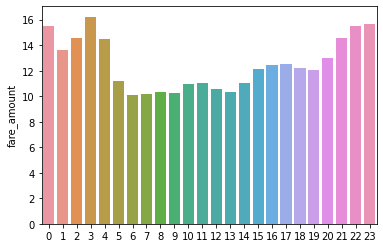

In [38]:
sns.barplot(x = sorted(df['hour'].unique()), y = hourly_mean['fare_amount'])

**Observation**:
* Mean fare amount is high in between 15:00 and 04:00

In [39]:
pass_mean = df.groupby(['passenger_count']).mean()
pass_mean

,VendorID,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,hour
passenger_count,,,,,,,,,,
1.0,1.588557,2.899062,1.024968,0.007699,161.399980,156.095124,1.361015,11.626750,2.176154,13.510036
2.0,1.671349,3.076531,1.023848,0.007514,159.591963,154.557171,1.377981,12.219257,2.179026,13.927475
3.0,1.781003,2.917975,1.016491,0.001319,158.268470,155.167546,1.376649,11.786280,2.148747,14.140501
4.0,1.854209,3.366530,1.036961,0.002053,158.439425,150.295688,1.328542,12.859343,2.150924,14.232033
5.0,1.986054,2.913798,1.019688,0.000000,164.801477,158.440525,1.362592,11.557014,2.136998,13.370796
6.0,1.986501,3.093136,1.018692,0.000000,152.280374,154.536864,1.331256,12.076324,2.149533,13.143302


<AxesSubplot:ylabel='fare_amount'>

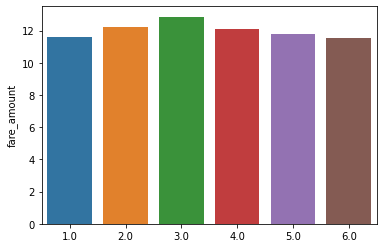

In [40]:
sns.barplot(x = df['passenger_count'].unique(), y = pass_mean['fare_amount'])

**Observation**:
* The number of passengers does not seem to impact the fare amount

<AxesSubplot:>

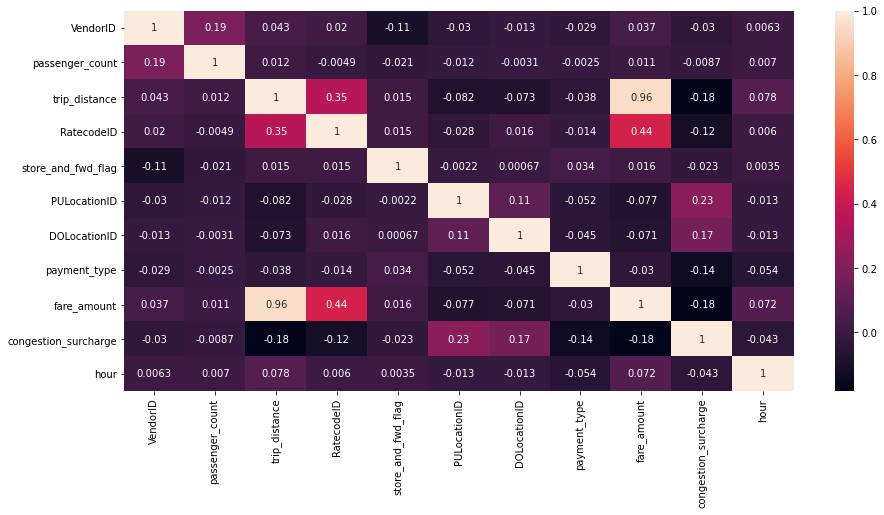

In [41]:
# filter approach using Pearson correlation
pearson_corr = df.corr()
plt.figure(figsize = (15,7))
sns.heatmap(data = pearson_corr, annot = True)

**Observation:**
* The fare amount is highly dependent on trip distance having pearson correlation 0.96
* The fare amount is also dependent on Rate Code ID and Location
* The fare amount is independent of Vendor ID, and store_and_fwd_flag

## Building Model

In [42]:
# Merge the fare amount and congestion surcharge and we can manually add this if trip passes through Congestion Zone
df['fare_amount'] = df['fare_amount']-df['congestion_surcharge']

In [43]:
# Cleaning Data
df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','congestion_surcharge','VendorID','payment_type'],axis=1,inplace=True)

In [44]:
df.dtypes

passenger_count       float64
trip_distance         float64
RatecodeID            float64
store_and_fwd_flag      int32
PULocationID            int64
DOLocationID            int64
fare_amount           float64
hour                    int64
dtype: object

In [45]:
df['passenger_count'] = df['passenger_count'].astype(int)
df['RatecodeID'] = df['RatecodeID'].astype(int)
df.dtypes

passenger_count         int32
trip_distance         float64
RatecodeID              int32
store_and_fwd_flag      int32
PULocationID            int64
DOLocationID            int64
fare_amount           float64
hour                    int64
dtype: object

In [46]:
df.head()

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,hour
0,1,2.73,1,0,224,148,9.5,13
2,1,2.05,1,0,79,68,5.5,7
3,1,1.40,1,0,236,75,3.5,15
4,1,0.60,1,0,186,90,1.5,16
5,1,4.00,1,0,137,236,12.5,13


In [1]:
from sklearn.linear_model import LinearRegression

In [47]:
X = df.drop('fare_amount',axis=1)
y = df['fare_amount']

In [86]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [49]:
# For training data
model.score(X,y)

0.9235070601063298

## Testing Data

In [81]:
file = pd.read_csv('C:/Users/PAVAN/Downloads/test_data_iitm.csv')
test_data = file.copy()

In [51]:
file

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,congestion_surcharge
0,2.0,2020-06-30 18:39:30,2020-06-30 18:45:11,1.0,1.66,1.0,N,48,90,1.0,2.5
1,2.0,2020-06-27 23:16:17,2020-06-27 23:23:17,3.0,1.50,1.0,N,48,246,2.0,2.5
2,1.0,2020-06-09 12:54:15,2020-06-09 13:01:25,1.0,1.90,1.0,N,237,234,1.0,2.5
3,2.0,2020-06-20 09:42:39,2020-06-20 09:45:12,1.0,0.27,1.0,N,170,170,2.0,2.5
4,2.0,2020-06-23 18:31:46,2020-06-23 18:48:34,2.0,4.06,1.0,N,186,238,2.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,2020-06-09 23:25:53,2020-06-09 23:26:01,1.0,0.00,1.0,N,74,74,3.0,0.0
9996,2.0,2020-06-03 13:07:44,2020-06-03 13:11:27,1.0,0.54,1.0,N,141,237,1.0,2.5
9997,2.0,2020-06-07 18:40:08,2020-06-07 18:46:23,1.0,1.14,1.0,N,41,74,1.0,0.0
9998,2.0,2020-06-12 15:27:56,2020-06-12 15:42:42,1.0,2.92,1.0,N,88,65,1.0,2.5


In [82]:
#Clean the data
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')
test_data['hour'] = test_data['tpep_pickup_datetime'].dt.strftime('%H')
test_data.fillna({'passenger_count':1.0,'RatecodeID':1.0, 'store_and_fwd_flag':'N'},inplace=True)
test_data['hour'] = test_data['hour'].apply(pd.to_numeric)
test_data['store_and_fwd_flag'] = LabelEncoder().fit_transform(test_data['store_and_fwd_flag'])
test_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','congestion_surcharge','VendorID','payment_type'],axis=1,inplace=True)

In [83]:
test_data['passenger_count'] = test_data['passenger_count'].astype(int)
test_data['RatecodeID'] = test_data['RatecodeID'].astype(int)

In [87]:
file['fare_amount'] = model.predict(test_data)

In [89]:
# congestion zone is a set that have values of Congestion region
i = 0
for index,row in test_data.iterrows():
    if row['PULocationID'] in congestion_zone or row['DOLocationID'] in congestion_zone:
        file['fare_amount'].iloc[i] += 2.5
    i += 1

In [90]:
file

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,congestion_surcharge,fare_amount
0,2.0,2020-06-30 18:39:30,2020-06-30 18:45:11,1.0,1.66,1.0,N,48,90,1.0,2.5,8.901576
1,2.0,2020-06-27 23:16:17,2020-06-27 23:23:17,3.0,1.50,1.0,N,48,246,2.0,2.5,8.105450
2,1.0,2020-06-09 12:54:15,2020-06-09 13:01:25,1.0,1.90,1.0,N,237,234,1.0,2.5,8.737924
3,2.0,2020-06-20 09:42:39,2020-06-20 09:45:12,1.0,0.27,1.0,N,170,170,2.0,2.5,4.612570
4,2.0,2020-06-23 18:31:46,2020-06-23 18:48:34,2.0,4.06,1.0,N,186,238,2.0,2.5,14.734978
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,2020-06-09 23:25:53,2020-06-09 23:26:01,1.0,0.00,1.0,N,74,74,3.0,0.0,4.413773
9996,2.0,2020-06-03 13:07:44,2020-06-03 13:11:27,1.0,0.54,1.0,N,141,237,1.0,2.5,5.254652
9997,2.0,2020-06-07 18:40:08,2020-06-07 18:46:23,1.0,1.14,1.0,N,41,74,1.0,0.0,7.548341
9998,2.0,2020-06-12 15:27:56,2020-06-12 15:42:42,1.0,2.92,1.0,N,88,65,1.0,2.5,12.280478


In [91]:
file.to_csv('C:/Users/PAVAN/Downloads/ME19B010_DAMODARAPATRUNI_PAVAN_predictions')

## Check

In [79]:
# r2_score = 61 %